# Example of how to use classification code for ship logbooks

### Imports

In [1]:
from exploringShipLogbooks.config import non_slave_ships
from exploringShipLogbooks.classification import LogbookClassifier

C:\Users\Emma\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Initialize classifier
- Classification algorithm can be set to "Naive Bayes" or "Decision Tree"

In [ ]:
cl = LogbookClassifier(classification_algorithm="Naive Bayes")

### Load Data, Clean data, and Perform Classification
- This function loads, cleans, and classifies data
- Options include:
    - fuzz - boolean value for whether to perform fuzzy string matching on values or not
    - export_csv - boolean value to determine whether classification output is saved. The csv contains information for every log used in the code, with the following key:
        - 0 = unclassified data
        - 1 = data used as negative training data
        - 2 = data used as positive validation data from cliwoc database
        - 3 = slave trade database data
        - 4 = data classified as a non-slave ship
        - 5 = data classified a sa slave ship

In [22]:
cl.load_clean_and_classify(fuzz=False, export_csv=True)

Loading data...
Finding ship logs that mention slaves...
Found  464  logs that mention slaves
Finding training data...
Cleaning data...
Joining data sets...
Encoding data...
Extracting training and validation data...
Fiting classifier...
Validating Classifier...

validation set 0  results:  Counter({0.0: 56})
validation set 1  results:  Counter({1.0: 4542})
Classifing unknown data...

98.89 of data was classified as  0.0
1.11 of data was classified as  1.0
Exporting data...


C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DtypeWarning: Columns (5,6,7,8,11,13,18,19,23,24,25,26,28,29,30,34,35,38,43,44,46,73,77,81,82,84,85,87,88,94,96,97,98,99,111,114,116,119,120,122,124,125,127,129,131,133,135,137,140) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app


### How to access data from outside of the classifier

In [4]:
# data that was classified (unknown class before classification)
cl.unclassified_logs.head()

,Nationality,ShipType,VoyageFrom,VoyageTo,Year,slave_logs
0,5,74,162,287,1785,4
1,5,74,162,287,1789,4
2,17,42,37,87,1847,4
3,17,73,66,269,1849,4
8,5,74,41,351,1760,4


In [6]:
# data used for validation: 20% of slave voyage logs
cl.validation_set_2.head()

,Nationality,ShipType,VoyageFrom,VoyageTo,Year,slave_logs
1651,13,14,395,7,1816,3
1652,16,14,26,7,1816,3
1653,16,14,26,7,1816,3
1654,16,14,26,7,1816,3
1655,16,61,7,7,1817,3


In [7]:
# data used for validation: logs that mention slaves in cliwoc data set
cl.validation_set_1.head()

,Nationality,ShipType,VoyageFrom,VoyageTo,Year,slave_logs
16,5,92,221,341,1763,2
30,5,56,176,210,1786,2
40,5,91,263,324,1761,2
55,5,56,496,324,1773,2
746,5,83,42,210,1756,2


In [6]:
# data used for training classifier
cl.training_data.head()

,Nationality,ShipType,VoyageFrom,VoyageTo,Year,slave_logs
0,17,16,38,277,1848,1
1,17,15,68,247,1849,1
2,5,26,333,393,1807,1
3,5,83,363,210,1819,1
4,5,83,42,235,1750,1


### Sample plots of data

In [8]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pandas as pd

In [9]:
# load un-cleaned slave_voyage_logs data
file_name = './exploringShipLogbooks/data/tastdb-exp-2010'
slave_voyage_logs = pd.read_pickle(file_name)

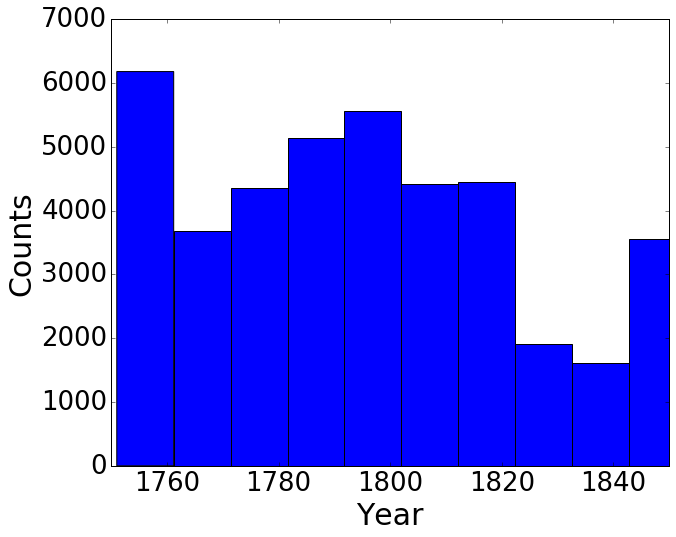

In [12]:
fig1, ax1 = plt.subplots()

ax1.hist(pd.concat([cl.validation_set_2, cl.training_data], ignore_index = True)['Year'])
ax1.set_xlabel('Year', fontsize = 30)
ax1.set_ylabel('Counts', fontsize = 30)
plt.xlim([1750, 1850])

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

fig1.set_size_inches(10, 8)

plt.savefig('slave_voyage_years.png')

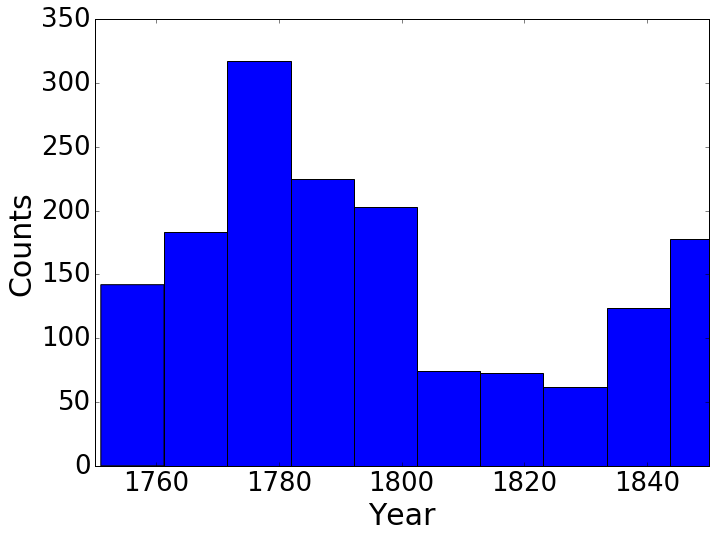

In [18]:
fig2, ax2 = plt.subplots()

ax2.hist(pd.concat([cl.validation_set_1, cl.unclassified_logs], ignore_index = True)['Year'])
ax2.set_xlabel('Year', fontsize = 30)
ax2.set_ylabel('Counts', fontsize = 30)
plt.xlim([1750, 1850])

for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

fig2.set_size_inches(11, 8)

plt.savefig('cliwoc_years.jpeg')

C:\Users\Emma\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1287: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


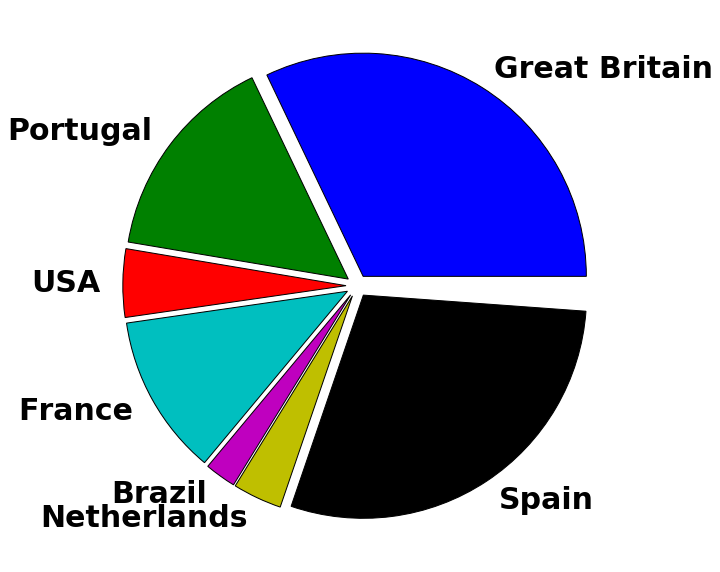

In [137]:
fractions = []
fract_dict = dict(slave_voyage_logs['national'].value_counts(normalize=True))
fractions = []
nats = []
for key in fract_dict:
    if fract_dict[key] > 0.01:
        nats.append(key)
        fractions.append(fract_dict[key])

explode=[0.05] * len(fractions)

fig2, ax2 = plt.subplots()
fig2.set_size_inches(10,10)
matplotlib.rcParams['font.size'] = 30

matplotlib.pylab.pie(fractions, labels = nats, explode = explode)

plt.savefig('slave_voyages_nats.png')

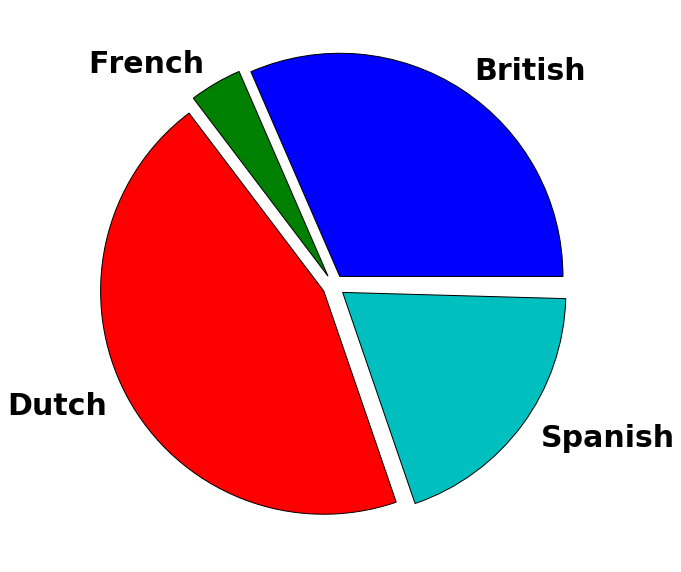

In [138]:
fractions = []
fract_dict = dict(cl.cliwoc_data_all['Nationality'].value_counts(normalize=True))
fractions = []
nats = []
for key in fract_dict:
    if fract_dict[key] > 0.01:
        nats.append(key)
        fractions.append(fract_dict[key])

explode=[0.05] * len(fractions)

fig2, ax2 = plt.subplots()
fig2.set_size_inches(10,10)
matplotlib.rcParams['font.size'] = 30

matplotlib.pylab.pie(fractions, labels = nats, explode = explode)

plt.savefig('cliwoc_nats.png')